#**Trabalho de Conclusão de Curso**
#Ciência de Dados Educacionais

In [1]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Carregando os dados do .csv para uma estrutura de dados Pandas Data Frame
dados_dependencias = pd.read_csv('https://github.com/viniciusveu/TCC-Ciencia_de_Dados_Educacionais/blob/main/dados/Escolas_Dependencias.csv?raw=true', delimiter=';') 
dados_enderecos = pd.read_csv('https://github.com/viniciusveu/TCC-Ciencia_de_Dados_Educacionais/blob/main/dados/escolas_enderecos.csv?raw=true', error_bad_lines=False)
dados_idesp = pd.read_csv('https://github.com/viniciusveu/TCC-Ciencia_de_Dados_Educacionais/raw/main/dados/IDESP_ESCOLA_2019.csv')

b'Skipping line 25881: expected 19 fields, saw 20\n'


In [3]:
dados_dependencias.head() #Primeiro contato com a tabela de dependências

,NOMEDEP,DE,MUN,DISTR,CODESC,NOMESC,TIPOESC,TIPOESC_DESC,SITUACAO,SALAS_AULA,SALAS_ED_INF,SALAS_ED_ESP,SALAS_ED_ART,SALA_RECURSO,TOT_SALAS_AULA,AUDITORIO,ANFITEATRO,TEATRO,CANTINA,COPA,COZINHA,REFEITORIO,DEPOSITO_ALIMENTOS,DESPENSA,TOT_DESPENSA,SALA_LEITURA,BIBLIOTECA,TOT_SALA_LEITURA,QUADRA_COBERTA,QUADRA_DESCOBERTA,GINASIO,TOT_QUADRA,QUADRA_AREIA,QUADRA_GRAMA,CAMPO_FUTEBOL,GABINETE_DENTARIO,CONSULTORIO_MEDICO,ENFERMARIA,AMBULATORIO,ALMOXARIFADO,...,LAB_TURISMO,LAVATORIO,MANGUEIRA,MINHOCARIO,PACKING_HOUSE,POMAR,PSICULTURA,RECEPCAO,SALA_ATENDIMENTO,SALA_ATEND_PSICOLOGICO,SALA_AUX_COORDENACAO,SALA_DADOS,SALA_DEP_PESSOAL,SALA_ED_RELIGIOSA,SALA_ENERGIA_ELETRICA,SALA_ENTRETENIMENTO,SALA_ESTAGIO,SALA_GINASTICA,SALA_INSUMO_AGRICOLA,SALA_INSUMO_VETERINARIO,SALA_MARKETING,SALA_MATRICULA,SALA_MUSICA,SALA_POS_GRADUACAO,SALA_ORDENHA,SALA_PROC_PROD_AGROPECUARIOS,SALA_SEGURANCA,SALA_TELEFONIA,SALA_FINANCEIRO,SALA_PASTORAL,SALA_RESERV_AGUA,SERVIDOR,SILO,VARANDA,VIVEIRO,SALA_REORG_NEURO,SALA_TERAPIA_OCUP,SALA_SERIGRAFIA,SALA_MARCENARIA,QUIOSQUE
0,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,985429,CEL JTO A EE FLEURIDES CAVALINI MENECHINO PROFA,6,CEL,Ativa,5,0,0,0,0,5,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,31045,DURVALINO GRION PROF,8,EE,Ativa,9,0,0,0,0,9,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,31112,FLEURIDES CAVALLINI MENECHINO PROFA,8,EE,Ativa,12,0,0,0,1,13,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,8,EE,Ativa,16,0,0,0,2,18,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ESTADUAL - SE,ADAMANTINA,DRACENA,DRACENA,31264,9 DE JULHO,8,EE,Ativa,21,0,0,0,0,21,0,0,0,0,1,1,1,1,0,1,1,0,1,0,1,1,2,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
dados_dependencias.shape #Dimensão da minha tabela

(5608, 172)

In [5]:
dados_dependencias['SITUACAO'].unique() #Verificando se possuem escolas com SITUAÇÂO != Ativa, que retonou que todas estão ativas

array(['Ativa'], dtype=object)

In [6]:
dados_dependencias.drop(['SITUACAO', 'TIPOESC', ], axis=1, inplace=True) #Apagando as colunas desnecessárias da tabela de dependências
dados_dependencias.head() #Nova tabela

,NOMEDEP,DE,MUN,DISTR,CODESC,NOMESC,TIPOESC_DESC,SALAS_AULA,SALAS_ED_INF,SALAS_ED_ESP,SALAS_ED_ART,SALA_RECURSO,TOT_SALAS_AULA,AUDITORIO,ANFITEATRO,TEATRO,CANTINA,COPA,COZINHA,REFEITORIO,DEPOSITO_ALIMENTOS,DESPENSA,TOT_DESPENSA,SALA_LEITURA,BIBLIOTECA,TOT_SALA_LEITURA,QUADRA_COBERTA,QUADRA_DESCOBERTA,GINASIO,TOT_QUADRA,QUADRA_AREIA,QUADRA_GRAMA,CAMPO_FUTEBOL,GABINETE_DENTARIO,CONSULTORIO_MEDICO,ENFERMARIA,AMBULATORIO,ALMOXARIFADO,ARQUIVO,REPROGRAFIA,...,LAB_TURISMO,LAVATORIO,MANGUEIRA,MINHOCARIO,PACKING_HOUSE,POMAR,PSICULTURA,RECEPCAO,SALA_ATENDIMENTO,SALA_ATEND_PSICOLOGICO,SALA_AUX_COORDENACAO,SALA_DADOS,SALA_DEP_PESSOAL,SALA_ED_RELIGIOSA,SALA_ENERGIA_ELETRICA,SALA_ENTRETENIMENTO,SALA_ESTAGIO,SALA_GINASTICA,SALA_INSUMO_AGRICOLA,SALA_INSUMO_VETERINARIO,SALA_MARKETING,SALA_MATRICULA,SALA_MUSICA,SALA_POS_GRADUACAO,SALA_ORDENHA,SALA_PROC_PROD_AGROPECUARIOS,SALA_SEGURANCA,SALA_TELEFONIA,SALA_FINANCEIRO,SALA_PASTORAL,SALA_RESERV_AGUA,SERVIDOR,SILO,VARANDA,VIVEIRO,SALA_REORG_NEURO,SALA_TERAPIA_OCUP,SALA_SERIGRAFIA,SALA_MARCENARIA,QUIOSQUE
0,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,985429,CEL JTO A EE FLEURIDES CAVALINI MENECHINO PROFA,CEL,5,0,0,0,0,5,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,31045,DURVALINO GRION PROF,EE,9,0,0,0,0,9,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,31112,FLEURIDES CAVALLINI MENECHINO PROFA,EE,12,0,0,0,1,13,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,5,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,EE,16,0,0,0,2,18,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ESTADUAL - SE,ADAMANTINA,DRACENA,DRACENA,31264,9 DE JULHO,EE,21,0,0,0,0,21,0,0,0,0,1,1,1,1,0,1,1,0,1,0,1,1,2,0,0,0,1,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
dados_idesp.head() #Primeiro contato com a tabela de notas do IDESP

,ANO_LETIVO,CODIGO_CIE,CODIGO_INEP,CodigoDiretoria,NomeDiretoria,NomeEscola,NomeMunicipio,ANOS_INICIAIS,ANOS_FINAIS,ENSINO_MÉDIO
0,2019,349124,35349124,20407,JUNDIAI,BAIRRO FAZENDA GRANDE,JUNDIAI,0.0,4.14,2.75
1,2019,350308,35350308,20410,PIRACICABA,EDSON RONTANI,PIRACICABA,0.0,2.78,1.96
2,2019,350588,35350588,20507,RIBEIRAO PRETO,JARDIM DIVA TARLA DE CARVALHO,RIBEIRAO PRETO,0.0,2.71,2.13
3,2019,350643,35350643,20507,RIBEIRAO PRETO,NEUSA MARIA DO BEM PROFESSORA,SERRANA,0.0,3.22,2.13
4,2019,351064,35351064,20205,SAO JOSE DOS CAMPOS,SONIA MARIA ALEXANDRE PEREIRA PROFESSORA,SAO JOSE DOS CAMPOS,0.0,2.91,2.08


In [8]:
dados_enderecos.head()

,nomedep,depadm,mun,codmun,de,CD_ESCOLA,CD_DIRETORIA,CD_DIRETORIA_ESTADUAL,CD_DIRETORIA_SUPVS_PROPR,NM_COMPLETO_ESCOLA,CD_UNIDADE,DS_ENDERECO,COMPLEMENTO,NUMERO,CD_ORIGEM_UNIDADE,CD_ORIGEM_ESCOLA,CD_ORIGEM_ENDERECO,LATITUDE,LONGITUDE
0,ESTADUAL - SE,1,SAO PAULO,100,NORTE 1,36444,10101,10101,10101,GENESIO DE ALMEIDA MOURA DOUTOR,37806,DOMINGOS AREVALO,RUA,862,37806,36444,37866,-23.447000,-46.696700
1,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,1582,10205,10205,10205,DOMINGOS FAUSTINO SARMIENTO,24902,21 DE ABRIL,RUA,970,24902,1582,24962,-23.542232,-46.605793
2,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,2173,10205,10205,10205,JOAO BORGES PROFESSOR,24901,ITAPURA,RUA,976,24901,2173,24961,-23.547300,-46.566000
3,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,3086,10207,10207,10207,HELENA LOMBARDI BRAGA PROFESSORA,24918,VIRGINIA DE MIRANDA,RUA,138,24918,3086,24978,-23.526587,-46.452888
4,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,2884,10207,10207,10207,RAUL PILLA DEPUTADO,24923,RUA SAO BERTOLDO,RUA,449,24923,2884,24983,-23.494297,-46.457064


In [9]:
dados_dependencias.columns #Colunas de dependências

Index(['NOMEDEP', 'DE', 'MUN', 'DISTR', 'CODESC', 'NOMESC', 'TIPOESC_DESC',
       'SALAS_AULA', 'SALAS_ED_INF', 'SALAS_ED_ESP',
       ...
       'SALA_RESERV_AGUA', 'SERVIDOR', 'SILO', 'VARANDA', 'VIVEIRO',
       'SALA_REORG_NEURO', 'SALA_TERAPIA_OCUP', 'SALA_SERIGRAFIA',
       'SALA_MARCENARIA', 'QUIOSQUE'],
      dtype='object', length=170)

In [10]:
dados_enderecos.columns #Colunas de endereços 

Index(['nomedep', 'depadm', 'mun', 'codmun', 'de', 'CD_ESCOLA', 'CD_DIRETORIA',
       'CD_DIRETORIA_ESTADUAL', 'CD_DIRETORIA_SUPVS_PROPR',
       'NM_COMPLETO_ESCOLA', 'CD_UNIDADE', 'DS_ENDERECO', 'COMPLEMENTO',
       'NUMERO', 'CD_ORIGEM_UNIDADE', 'CD_ORIGEM_ESCOLA', 'CD_ORIGEM_ENDERECO',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [11]:
dados_idesp.columns #Colunas de notas do IDESP

Index(['ANO_LETIVO', 'CODIGO_CIE', 'CODIGO_INEP', 'CodigoDiretoria',
       'NomeDiretoria', 'NomeEscola', 'NomeMunicipio', 'ANOS_INICIAIS',
       'ANOS_FINAIS', 'ENSINO_MÉDIO'],
      dtype='object')

#Tabela de Dependências

In [12]:
dados_dependencias.head()

,NOMEDEP,DE,MUN,DISTR,CODESC,NOMESC,TIPOESC_DESC,SALAS_AULA,SALAS_ED_INF,SALAS_ED_ESP,SALAS_ED_ART,SALA_RECURSO,TOT_SALAS_AULA,AUDITORIO,ANFITEATRO,TEATRO,CANTINA,COPA,COZINHA,REFEITORIO,DEPOSITO_ALIMENTOS,DESPENSA,TOT_DESPENSA,SALA_LEITURA,BIBLIOTECA,TOT_SALA_LEITURA,QUADRA_COBERTA,QUADRA_DESCOBERTA,GINASIO,TOT_QUADRA,QUADRA_AREIA,QUADRA_GRAMA,CAMPO_FUTEBOL,GABINETE_DENTARIO,CONSULTORIO_MEDICO,ENFERMARIA,AMBULATORIO,ALMOXARIFADO,ARQUIVO,REPROGRAFIA,...,LAB_TURISMO,LAVATORIO,MANGUEIRA,MINHOCARIO,PACKING_HOUSE,POMAR,PSICULTURA,RECEPCAO,SALA_ATENDIMENTO,SALA_ATEND_PSICOLOGICO,SALA_AUX_COORDENACAO,SALA_DADOS,SALA_DEP_PESSOAL,SALA_ED_RELIGIOSA,SALA_ENERGIA_ELETRICA,SALA_ENTRETENIMENTO,SALA_ESTAGIO,SALA_GINASTICA,SALA_INSUMO_AGRICOLA,SALA_INSUMO_VETERINARIO,SALA_MARKETING,SALA_MATRICULA,SALA_MUSICA,SALA_POS_GRADUACAO,SALA_ORDENHA,SALA_PROC_PROD_AGROPECUARIOS,SALA_SEGURANCA,SALA_TELEFONIA,SALA_FINANCEIRO,SALA_PASTORAL,SALA_RESERV_AGUA,SERVIDOR,SILO,VARANDA,VIVEIRO,SALA_REORG_NEURO,SALA_TERAPIA_OCUP,SALA_SERIGRAFIA,SALA_MARCENARIA,QUIOSQUE
0,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,985429,CEL JTO A EE FLEURIDES CAVALINI MENECHINO PROFA,CEL,5,0,0,0,0,5,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,31045,DURVALINO GRION PROF,EE,9,0,0,0,0,9,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,31112,FLEURIDES CAVALLINI MENECHINO PROFA,EE,12,0,0,0,1,13,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,5,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,EE,16,0,0,0,2,18,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ESTADUAL - SE,ADAMANTINA,DRACENA,DRACENA,31264,9 DE JULHO,EE,21,0,0,0,0,21,0,0,0,0,1,1,1,1,0,1,1,0,1,0,1,1,2,0,0,0,1,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
dados_dependencias['TIPOESC_DESC'].value_counts() #Verificando quantos tipos de escolas existem na tabela e sua frequência

EE                                     5052
CEL                                     188
CLASSE PENITENCIÁRIA                    150
FEBEM - UI (CASA À PARTIR DE 2007)      108
FEBEM - UIP (CASA À PARTIR DE 2007)      41
EEI                                      39
ÁREA DE ASSENTAMENTO                     16
CLASSE HOSPITALAR                         9
QUILOMBO                                  4
CEEJA                                     1
Name: TIPOESC_DESC, dtype: int64

In [14]:
dados_dependencias['TIPOESC_DESC'].value_counts(normalize=True) #Em %

EE                                     0.900856
CEL                                    0.033524
CLASSE PENITENCIÁRIA                   0.026748
FEBEM - UI (CASA À PARTIR DE 2007)     0.019258
FEBEM - UIP (CASA À PARTIR DE 2007)    0.007311
EEI                                    0.006954
ÁREA DE ASSENTAMENTO                   0.002853
CLASSE HOSPITALAR                      0.001605
QUILOMBO                               0.000713
CEEJA                                  0.000178
Name: TIPOESC_DESC, dtype: float64

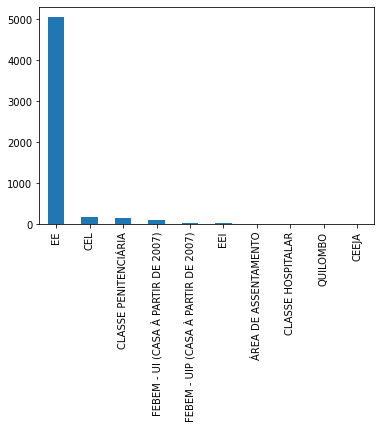

In [15]:
dados_dependencias['TIPOESC_DESC'].value_counts().plot.bar() #Visualizando em um gráfico de barras

In [16]:
dados_dependencias['NOMEDEP'].value_counts() #Verificando quantos tipos de escolas existem na tabela e sua frequência

ESTADUAL - SE    5608
Name: NOMEDEP, dtype: int64

In [17]:
dados_dependencias.head()

,NOMEDEP,DE,MUN,DISTR,CODESC,NOMESC,TIPOESC_DESC,SALAS_AULA,SALAS_ED_INF,SALAS_ED_ESP,SALAS_ED_ART,SALA_RECURSO,TOT_SALAS_AULA,AUDITORIO,ANFITEATRO,TEATRO,CANTINA,COPA,COZINHA,REFEITORIO,DEPOSITO_ALIMENTOS,DESPENSA,TOT_DESPENSA,SALA_LEITURA,BIBLIOTECA,TOT_SALA_LEITURA,QUADRA_COBERTA,QUADRA_DESCOBERTA,GINASIO,TOT_QUADRA,QUADRA_AREIA,QUADRA_GRAMA,CAMPO_FUTEBOL,GABINETE_DENTARIO,CONSULTORIO_MEDICO,ENFERMARIA,AMBULATORIO,ALMOXARIFADO,ARQUIVO,REPROGRAFIA,...,LAB_TURISMO,LAVATORIO,MANGUEIRA,MINHOCARIO,PACKING_HOUSE,POMAR,PSICULTURA,RECEPCAO,SALA_ATENDIMENTO,SALA_ATEND_PSICOLOGICO,SALA_AUX_COORDENACAO,SALA_DADOS,SALA_DEP_PESSOAL,SALA_ED_RELIGIOSA,SALA_ENERGIA_ELETRICA,SALA_ENTRETENIMENTO,SALA_ESTAGIO,SALA_GINASTICA,SALA_INSUMO_AGRICOLA,SALA_INSUMO_VETERINARIO,SALA_MARKETING,SALA_MATRICULA,SALA_MUSICA,SALA_POS_GRADUACAO,SALA_ORDENHA,SALA_PROC_PROD_AGROPECUARIOS,SALA_SEGURANCA,SALA_TELEFONIA,SALA_FINANCEIRO,SALA_PASTORAL,SALA_RESERV_AGUA,SERVIDOR,SILO,VARANDA,VIVEIRO,SALA_REORG_NEURO,SALA_TERAPIA_OCUP,SALA_SERIGRAFIA,SALA_MARCENARIA,QUIOSQUE
0,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,985429,CEL JTO A EE FLEURIDES CAVALINI MENECHINO PROFA,CEL,5,0,0,0,0,5,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,31045,DURVALINO GRION PROF,EE,9,0,0,0,0,9,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,31112,FLEURIDES CAVALLINI MENECHINO PROFA,EE,12,0,0,0,1,13,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,5,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,EE,16,0,0,0,2,18,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ESTADUAL - SE,ADAMANTINA,DRACENA,DRACENA,31264,9 DE JULHO,EE,21,0,0,0,0,21,0,0,0,0,1,1,1,1,0,1,1,0,1,0,1,1,2,0,0,0,1,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
dados_dependencias['MUN'].value_counts(normalize=True) #20% só em São Paulo, o próximo município possui apenas 3% (Guarulhos) das escolas

SAO PAULO                 0.206491
GUARULHOS                 0.031384
CAMPINAS                  0.030136
SANTO ANDRE               0.016049
SOROCABA                  0.015692
                            ...   
ARAPEI                    0.000178
ZACARIAS                  0.000178
SEBASTIANOPOLIS DO SUL    0.000178
FLOREAL                   0.000178
CASSIA DOS COQUEIROS      0.000178
Name: MUN, Length: 644, dtype: float64

In [19]:
dados_dependencias['DE'].value_counts(normalize=True) #Sem muita discrepância

SUL 3                   0.020150
RIBEIRAO PRETO          0.019971
MAUA                    0.019258
NORTE 1                 0.018902
CAMPINAS OESTE          0.018010
                          ...   
BIRIGUI                 0.004458
ITAPEVA                 0.004101
SAO JOAQUIM DA BARRA    0.003745
PENAPOLIS               0.003388
PIRAJU                  0.002853
Name: DE, Length: 91, dtype: float64

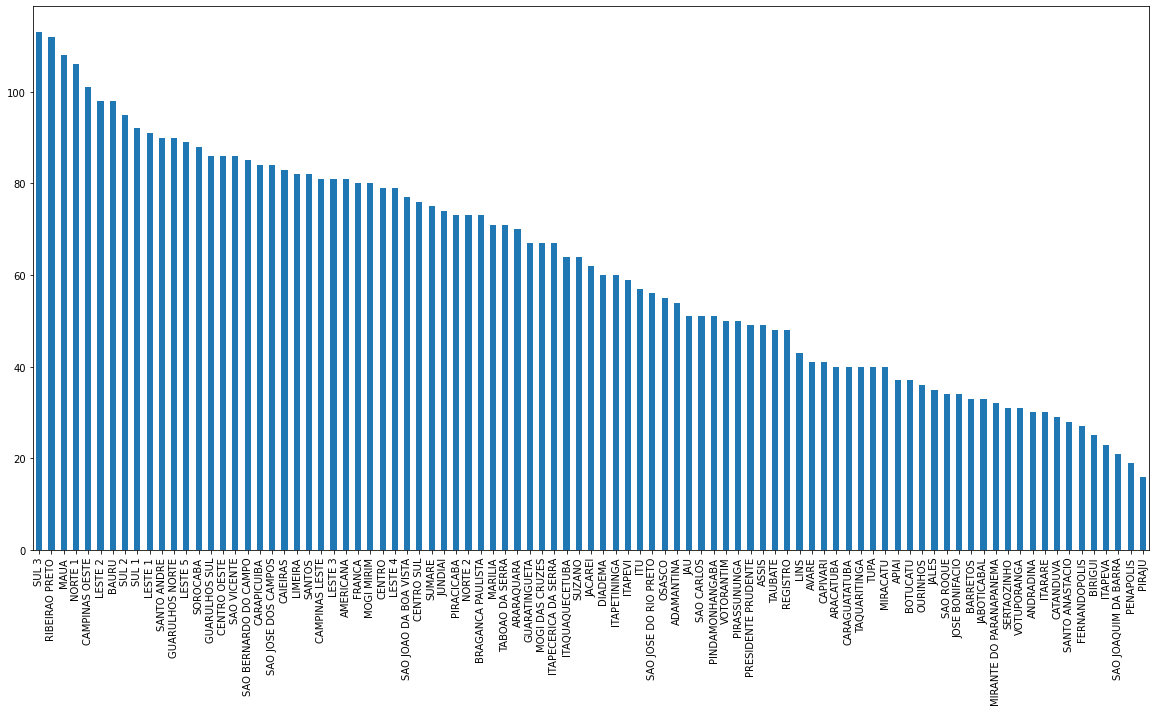

In [20]:
plt.figure(figsize=(20,10))
dados_dependencias['DE'].value_counts().plot.bar() #Diretorias de Ensino com mais escolas

In [21]:
dados_dependencias_filtro = dados_dependencias.loc[:, 'SALAS_AULA':]
dados_dependencias_filtro

,SALAS_AULA,SALAS_ED_INF,SALAS_ED_ESP,SALAS_ED_ART,SALA_RECURSO,TOT_SALAS_AULA,AUDITORIO,ANFITEATRO,TEATRO,CANTINA,COPA,COZINHA,REFEITORIO,DEPOSITO_ALIMENTOS,DESPENSA,TOT_DESPENSA,SALA_LEITURA,BIBLIOTECA,TOT_SALA_LEITURA,QUADRA_COBERTA,QUADRA_DESCOBERTA,GINASIO,TOT_QUADRA,QUADRA_AREIA,QUADRA_GRAMA,CAMPO_FUTEBOL,GABINETE_DENTARIO,CONSULTORIO_MEDICO,ENFERMARIA,AMBULATORIO,ALMOXARIFADO,ARQUIVO,REPROGRAFIA,SALA_GREMIO,DIRETORIA,VICEDIRETORIA,SALA_PROF,SECRETARIA,SALA_ORIENT_ED,SALA_COORD_PEDAG,...,LAB_TURISMO,LAVATORIO,MANGUEIRA,MINHOCARIO,PACKING_HOUSE,POMAR,PSICULTURA,RECEPCAO,SALA_ATENDIMENTO,SALA_ATEND_PSICOLOGICO,SALA_AUX_COORDENACAO,SALA_DADOS,SALA_DEP_PESSOAL,SALA_ED_RELIGIOSA,SALA_ENERGIA_ELETRICA,SALA_ENTRETENIMENTO,SALA_ESTAGIO,SALA_GINASTICA,SALA_INSUMO_AGRICOLA,SALA_INSUMO_VETERINARIO,SALA_MARKETING,SALA_MATRICULA,SALA_MUSICA,SALA_POS_GRADUACAO,SALA_ORDENHA,SALA_PROC_PROD_AGROPECUARIOS,SALA_SEGURANCA,SALA_TELEFONIA,SALA_FINANCEIRO,SALA_PASTORAL,SALA_RESERV_AGUA,SERVIDOR,SILO,VARANDA,VIVEIRO,SALA_REORG_NEURO,SALA_TERAPIA_OCUP,SALA_SERIGRAFIA,SALA_MARCENARIA,QUIOSQUE
0,5,0,0,0,0,5,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,2,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,9,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,12,0,0,0,1,13,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,5,1,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,2,18,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,2,1,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21,0,0,0,0,21,0,0,0,0,1,1,1,1,0,1,1,0,1,0,1,1,2,0,0,0,1,0,0,0,2,2,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5603,8,0,0,0,0,8,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5604,8,0,0,0,0,8,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5605,12,0,0,0,0,12,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5606,8,0,0,0,1,9,0,0,0,0,0,1,1,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


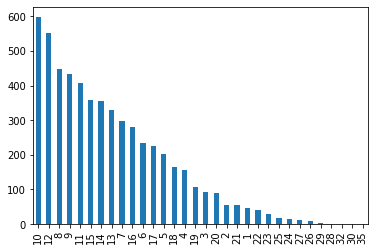

In [22]:
dados_dependencias_filtro['SALAS_AULA'].value_counts().plot.bar() #A maioria das escolas possui 10 salas de aula

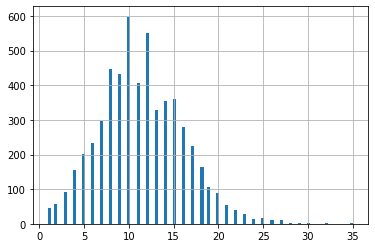

In [23]:
dados_dependencias_filtro['SALAS_AULA'].hist(bins=100) #Uma maneira melhor de visualizar

#Tabela Endereço

In [24]:
dados_enderecos #Analisando agora a tabela de endereços

,nomedep,depadm,mun,codmun,de,CD_ESCOLA,CD_DIRETORIA,CD_DIRETORIA_ESTADUAL,CD_DIRETORIA_SUPVS_PROPR,NM_COMPLETO_ESCOLA,CD_UNIDADE,DS_ENDERECO,COMPLEMENTO,NUMERO,CD_ORIGEM_UNIDADE,CD_ORIGEM_ESCOLA,CD_ORIGEM_ENDERECO,LATITUDE,LONGITUDE
0,ESTADUAL - SE,1,SAO PAULO,100,NORTE 1,36444,10101,10101,10101,GENESIO DE ALMEIDA MOURA DOUTOR,37806,DOMINGOS AREVALO,RUA,862,37806,36444,37866,-23.447000,-46.696700
1,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,1582,10205,10205,10205,DOMINGOS FAUSTINO SARMIENTO,24902,21 DE ABRIL,RUA,970,24902,1582,24962,-23.542232,-46.605793
2,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,2173,10205,10205,10205,JOAO BORGES PROFESSOR,24901,ITAPURA,RUA,976,24901,2173,24961,-23.547300,-46.566000
3,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,3086,10207,10207,10207,HELENA LOMBARDI BRAGA PROFESSORA,24918,VIRGINIA DE MIRANDA,RUA,138,24918,3086,24978,-23.526587,-46.452888
4,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,2884,10207,10207,10207,RAUL PILLA DEPUTADO,24923,RUA SAO BERTOLDO,RUA,449,24923,2884,24983,-23.494297,-46.457064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28724,PRIVADA,3,MATAO,441,ARARAQUARA,115373,17000,20501,17000,SESI 146 CENTRO EDUCACIONAL,2706,MARLENE DAVID DOS SANTOS,AVENIDA,940,2706,115373,2766,-21.602989,-48.364423
28725,PRIVADA,3,SAO PAULO,100,CENTRO OESTE,443906,19902,10312,19902,DA TURMA ESCOLA DE EDUCACAO INFANTIL,185425,PENSILVANIA,RUA,590,185425,443906,219825,-23.611356,-46.687105
28726,PRIVADA,3,SAO PAULO,100,SUL 2,184226,19903,10314,19903,MONTE AZUL CRECHE AC,14354,RUA VITALINA GRASSMANN,RUA,290,14354,184226,14414,-23.646599,-46.735442
28727,PRIVADA,3,SAO PAULO,100,SUL 1,292643,19903,10317,19903,COMUNIDADE KOLPING CEI,120848,ADOLFO KOLPING PADRE,AVENIDA,28,120848,292643,155248,-23.633697,-46.758397


In [25]:
dados_enderecos.shape #Dimensão da minha tabela

(28729, 19)

In [26]:
dados_enderecos['nomedep'].unique() #Verificando os tipos de mantenedores

array(['ESTADUAL - SE', 'MUNICIPAL', 'PRIVADA', 'ESTADUAL - OUTROS',
       'FEDERAL'], dtype=object)

In [27]:
dados_enderecos['nomedep'].value_counts() #A minoria das escolas são estaduais que não pertencem a Secretaria de Educação do estado e Federais.

MUNICIPAL            13184
PRIVADA               9159
ESTADUAL - SE         5928
ESTADUAL - OUTROS      426
FEDERAL                 32
Name: nomedep, dtype: int64

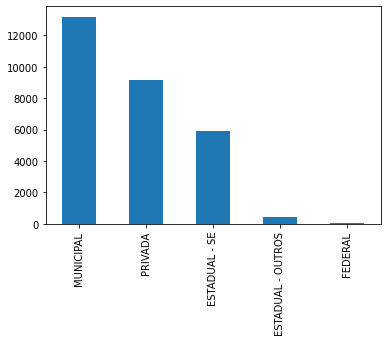

In [28]:
dados_enderecos['nomedep'].value_counts().plot.bar()

In [29]:
dados_enderecos['de'].value_counts()

CENTRO OESTE               991
RIBEIRAO PRETO             661
CENTRO SUL                 628
NORTE 1                    622
SAO VICENTE                568
                          ... 
PIRAJU                     103
ITARARE                     98
MIRACATU                    98
BIRIGUI                     96
MIRANTE DO PARANAPANEMA     86
Name: de, Length: 91, dtype: int64

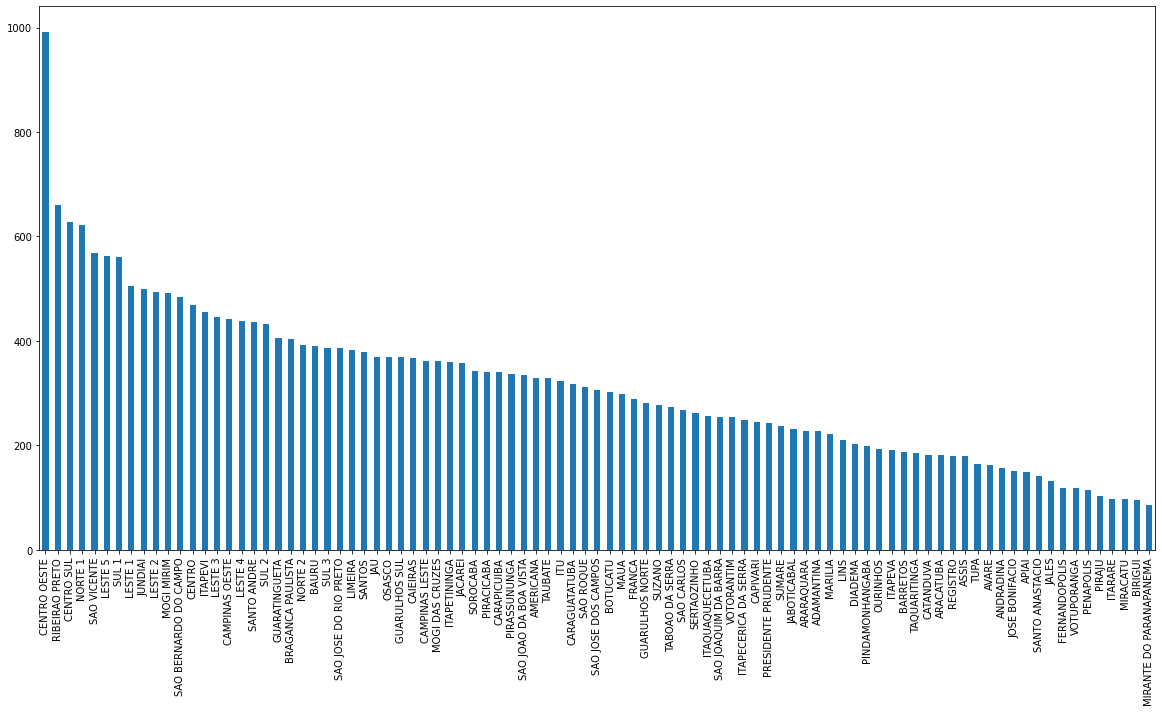

In [30]:
plt.figure(figsize=(20,10))
dados_enderecos['de'].value_counts().plot.bar() #Diretorias de Ensino com mais escolas

In [31]:
#Filtrando para ficarmos apenas com as escolas públicas estaduais
dados_enderecos_filtro = dados_enderecos.query('nomedep == "ESTADUAL - SE"')

In [32]:
dados_enderecos_filtro 

,nomedep,depadm,mun,codmun,de,CD_ESCOLA,CD_DIRETORIA,CD_DIRETORIA_ESTADUAL,CD_DIRETORIA_SUPVS_PROPR,NM_COMPLETO_ESCOLA,CD_UNIDADE,DS_ENDERECO,COMPLEMENTO,NUMERO,CD_ORIGEM_UNIDADE,CD_ORIGEM_ESCOLA,CD_ORIGEM_ENDERECO,LATITUDE,LONGITUDE
0,ESTADUAL - SE,1,SAO PAULO,100,NORTE 1,36444,10101,10101,10101,GENESIO DE ALMEIDA MOURA DOUTOR,37806,DOMINGOS AREVALO,RUA,862,37806,36444,37866,-23.447000,-46.696700
1,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,1582,10205,10205,10205,DOMINGOS FAUSTINO SARMIENTO,24902,21 DE ABRIL,RUA,970,24902,1582,24962,-23.542232,-46.605793
2,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,2173,10205,10205,10205,JOAO BORGES PROFESSOR,24901,ITAPURA,RUA,976,24901,2173,24961,-23.547300,-46.566000
3,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,3086,10207,10207,10207,HELENA LOMBARDI BRAGA PROFESSORA,24918,VIRGINIA DE MIRANDA,RUA,138,24918,3086,24978,-23.526587,-46.452888
4,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,2884,10207,10207,10207,RAUL PILLA DEPUTADO,24923,RUA SAO BERTOLDO,RUA,449,24923,2884,24983,-23.494297,-46.457064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28342,ESTADUAL - SE,1,SAO VICENTE,657,SAO VICENTE,37576,20103,20103,20103,ANTONIO LUIZ BARREIROS,19096,PAULO HORCEL,RUA,404,19096,37576,19156,-23.987863,-46.393014
28343,ESTADUAL - SE,1,POTIM,762,GUARATINGUETA,12725,20202,20202,20202,JOSE FELIX PROF,304,PRACA MIGUEL CORREA DOS OUROS,PRACA,32,304,12725,364,-22.843623,-45.251807
28344,ESTADUAL - SE,1,SAO JOSE DOS CAMPOS,645,SAO JOSE DOS CAMPOS,13626,20205,20205,20205,OLIMPIO CATAO,18725,PRACA AFONSO PENA,PRACA,SN,18725,13626,18785,-23.183812,-45.887279
28345,ESTADUAL - SE,1,SAO JOSE DOS CAMPOS,645,SAO JOSE DOS CAMPOS,13912,20205,20205,20205,RONDON MARECHAL,43700,FRANCISCO ESCOBAR,PRACA,165,43700,13912,43760,-23.183825,-45.874364


In [33]:
len(dados_dependencias.index) - len(dados_enderecos_filtro.index) #Diferenças de quantidade de escolas nas tabelas

-320

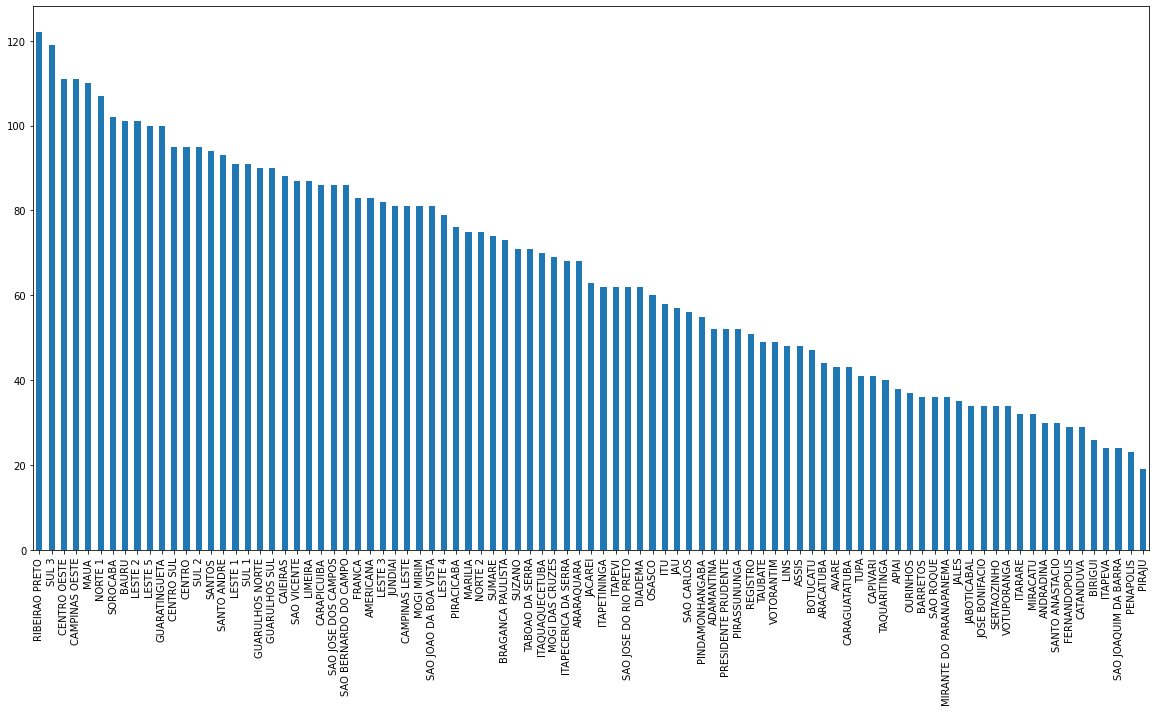

In [34]:
plt.figure(figsize=(20,10))
dados_enderecos_filtro['de'].value_counts().plot.bar() #Diretorias de Ensino com mais escolas

#Tabela IDESP

In [35]:
dados_idesp.head()

,ANO_LETIVO,CODIGO_CIE,CODIGO_INEP,CodigoDiretoria,NomeDiretoria,NomeEscola,NomeMunicipio,ANOS_INICIAIS,ANOS_FINAIS,ENSINO_MÉDIO
0,2019,349124,35349124,20407,JUNDIAI,BAIRRO FAZENDA GRANDE,JUNDIAI,0.0,4.14,2.75
1,2019,350308,35350308,20410,PIRACICABA,EDSON RONTANI,PIRACICABA,0.0,2.78,1.96
2,2019,350588,35350588,20507,RIBEIRAO PRETO,JARDIM DIVA TARLA DE CARVALHO,RIBEIRAO PRETO,0.0,2.71,2.13
3,2019,350643,35350643,20507,RIBEIRAO PRETO,NEUSA MARIA DO BEM PROFESSORA,SERRANA,0.0,3.22,2.13
4,2019,351064,35351064,20205,SAO JOSE DOS CAMPOS,SONIA MARIA ALEXANDRE PEREIRA PROFESSORA,SAO JOSE DOS CAMPOS,0.0,2.91,2.08


In [36]:
dados_idesp.shape

(5047, 10)

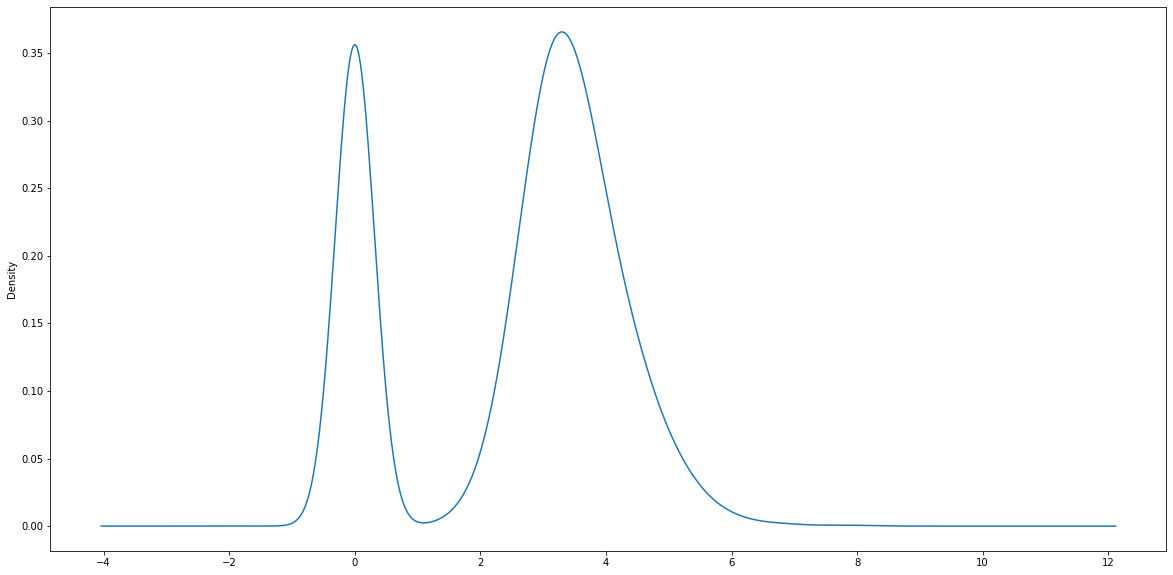

In [37]:
plt.figure(figsize=(20,10))
dados_idesp['ANOS_FINAIS'].plot.kde()

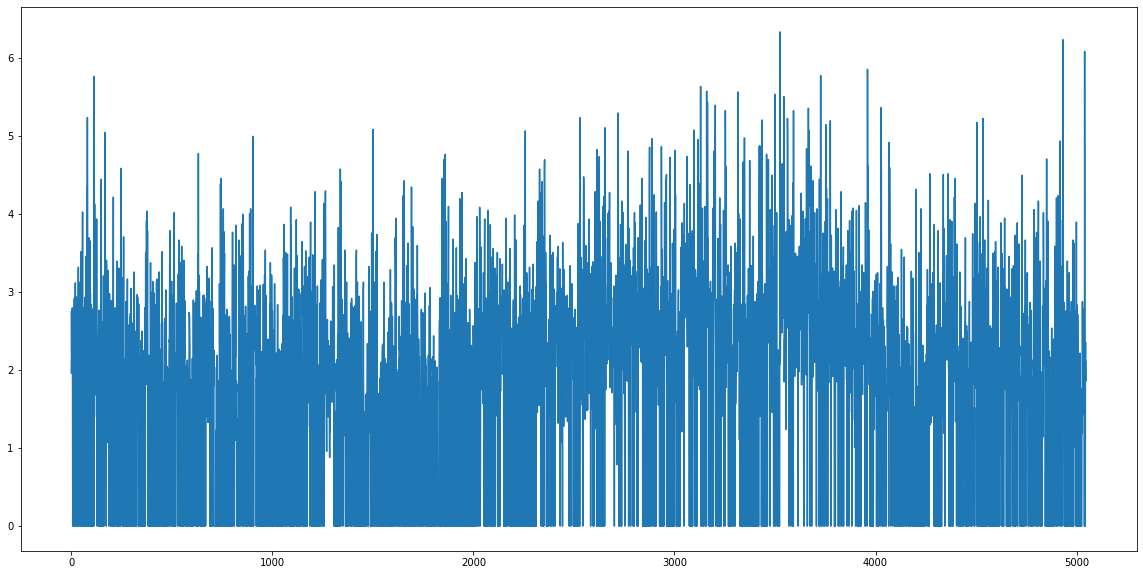

In [38]:
plt.figure(figsize=(20,10))
dados_idesp['ENSINO_MÉDIO'].plot.line()

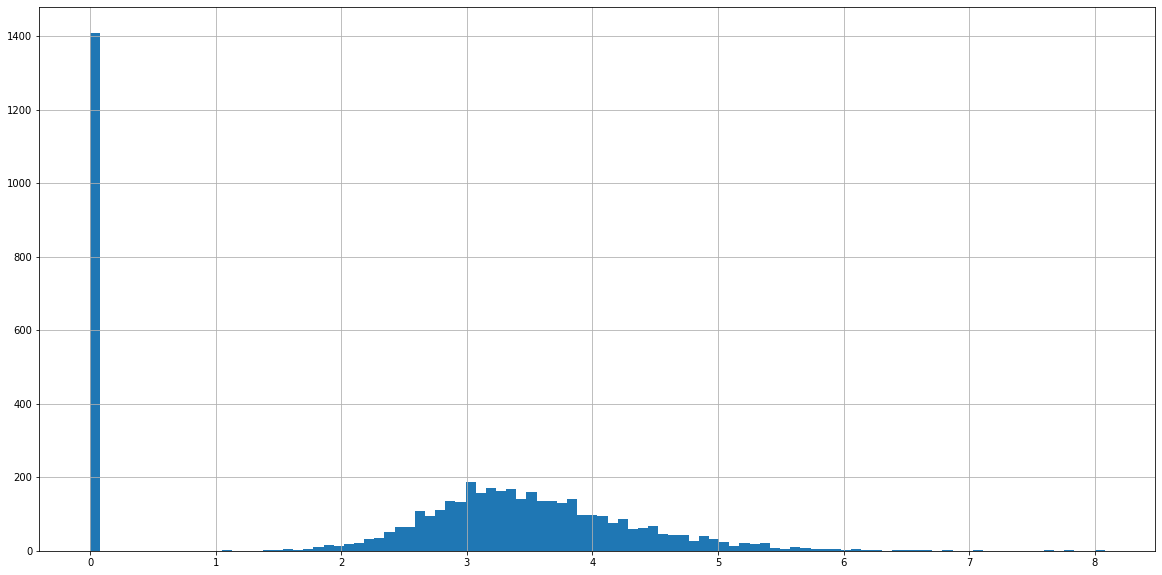

In [39]:
plt.figure(figsize=(20,10))
dados_idesp['ANOS_FINAIS'].hist(bins=100)

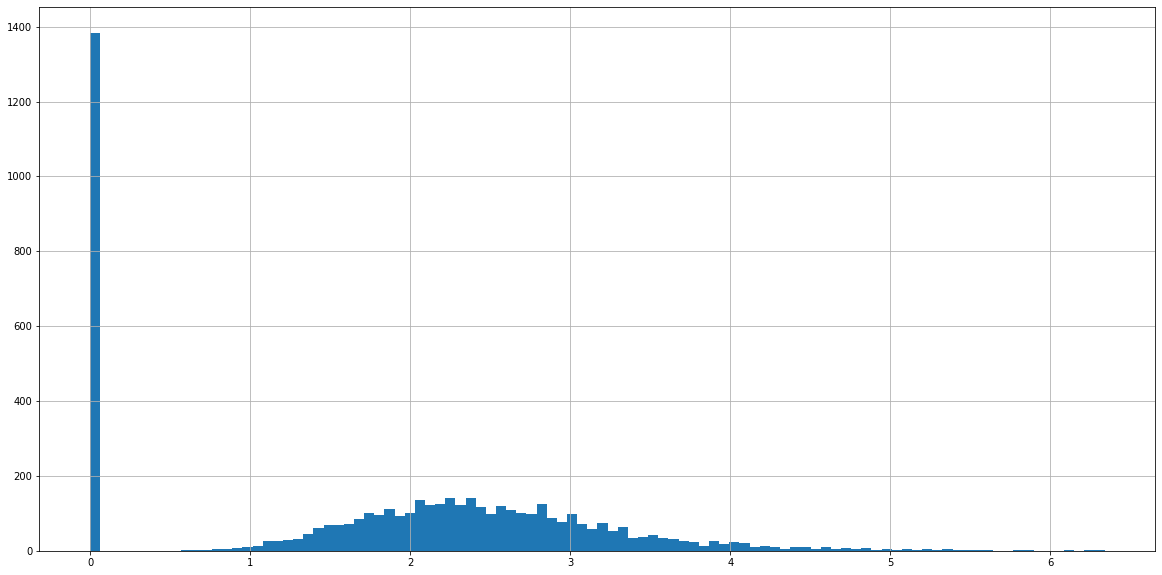

In [40]:
 plt.figure(figsize=(20,10))
dados_idesp['ENSINO_MÉDIO'].hist(bins=100)

In [41]:
dados_idesp_limpo = dados_idesp.query('ANOS_FINAIS > 0.0')

In [42]:
#Analisar as notas 0.0, pois podem atrapalhar 
len(dados_idesp['ANOS_FINAIS']) - len(dados_idesp_limpo) #1408 Escolas estavam com nota 0.0

1408

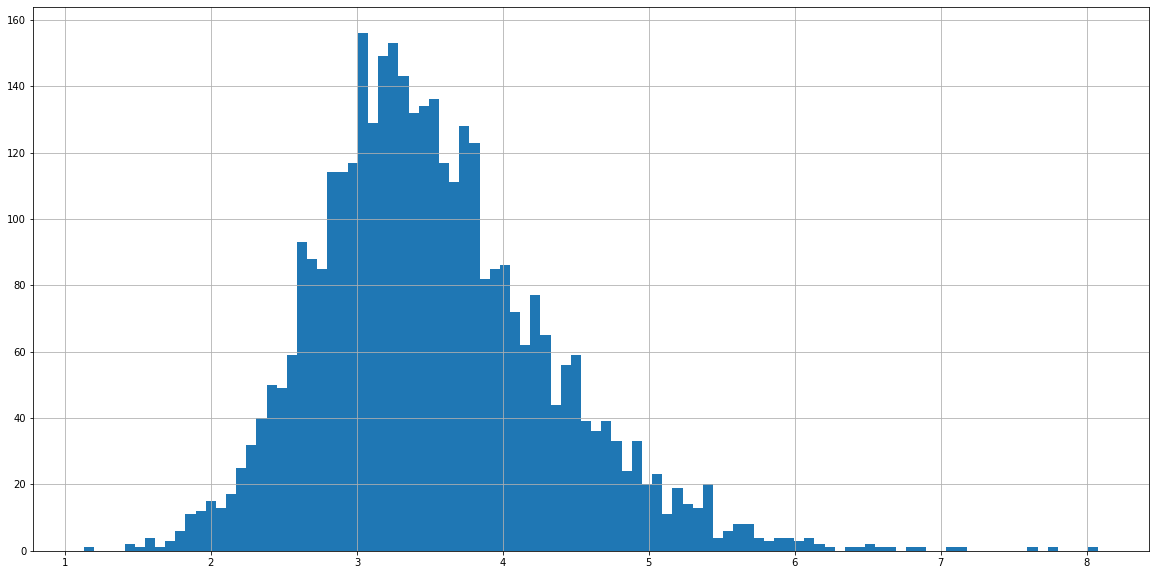

In [43]:
plt.figure(figsize=(20,10))
dados_idesp.query('ANOS_FINAIS > 0.0')['ANOS_FINAIS'].hist(bins=100)

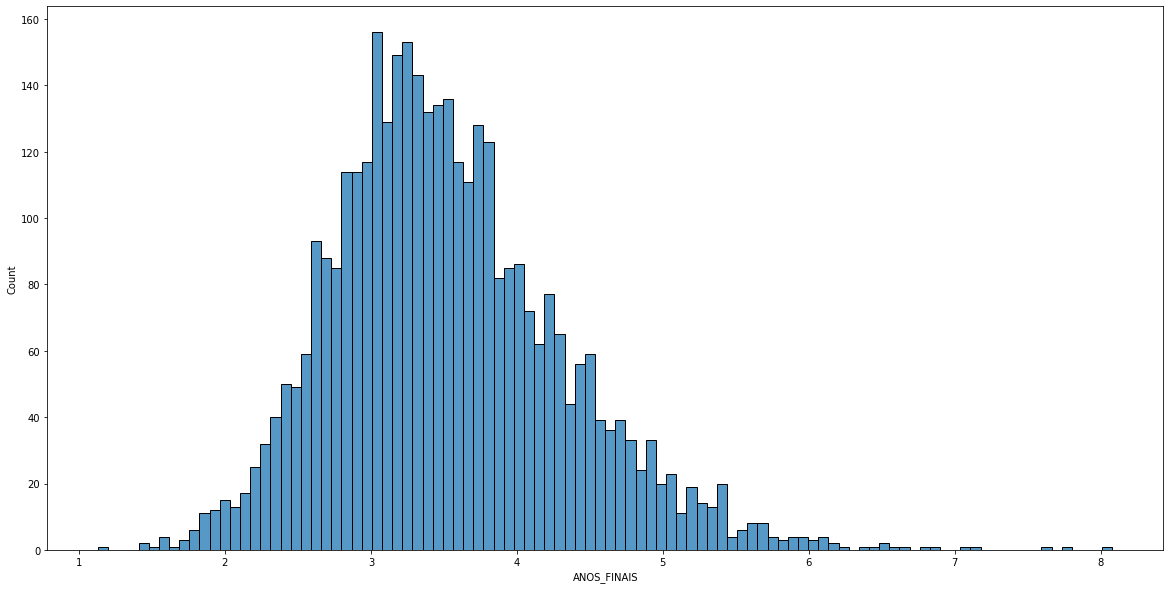

In [44]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.histplot(data=dados_idesp.query('ANOS_FINAIS > 0.0')['ANOS_FINAIS'], bins=100) #Gráfico mais bonitinho

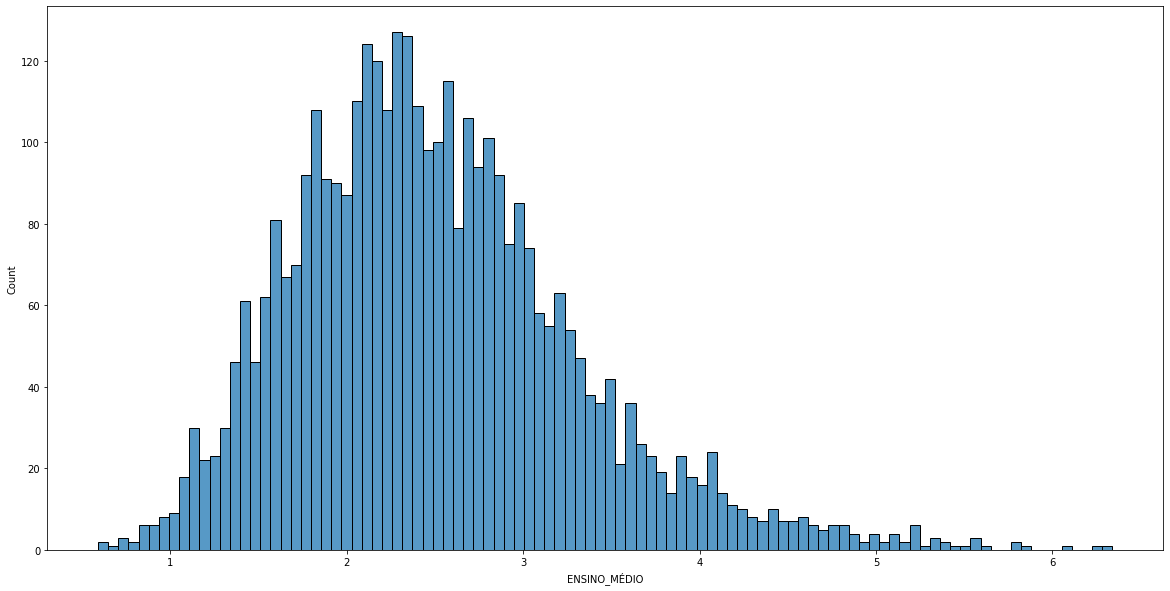

In [45]:
plt.figure(figsize=(20,10))
sns.histplot(data=dados_idesp.query('ENSINO_MÉDIO > 0.0')['ENSINO_MÉDIO'], bins=100) #Gráfico mais bonitinho

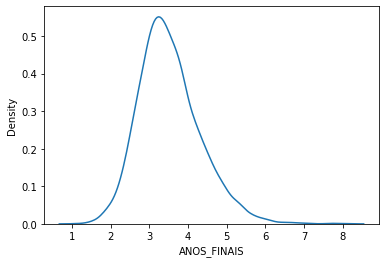

In [46]:
sns.kdeplot(data=dados_idesp.query('ANOS_FINAIS > 0.0')['ANOS_FINAIS'])

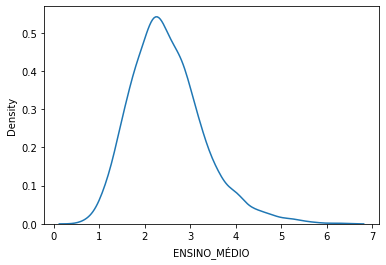

In [47]:
sns.kdeplot(data=dados_idesp.query('ENSINO_MÉDIO > 0.0')['ENSINO_MÉDIO']) #No EM o IDESP decai um pouco no geral

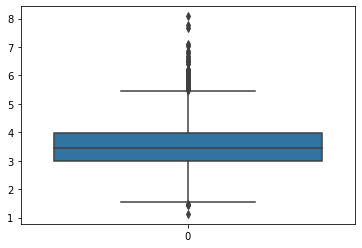

In [48]:
sns.boxplot(data=dados_idesp.query('ANOS_FINAIS > 0.0')['ANOS_FINAIS'])

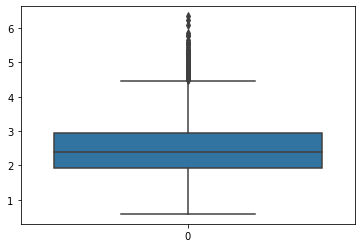

In [49]:
sns.boxplot(data=dados_idesp.query('ENSINO_MÉDIO > 0.0')['ENSINO_MÉDIO'])

In [50]:
dados_idesp_limpo

,ANO_LETIVO,CODIGO_CIE,CODIGO_INEP,CodigoDiretoria,NomeDiretoria,NomeEscola,NomeMunicipio,ANOS_INICIAIS,ANOS_FINAIS,ENSINO_MÉDIO
0,2019,349124,35349124,20407,JUNDIAI,BAIRRO FAZENDA GRANDE,JUNDIAI,0.00,4.14,2.75
1,2019,350308,35350308,20410,PIRACICABA,EDSON RONTANI,PIRACICABA,0.00,2.78,1.96
2,2019,350588,35350588,20507,RIBEIRAO PRETO,JARDIM DIVA TARLA DE CARVALHO,RIBEIRAO PRETO,0.00,2.71,2.13
3,2019,350643,35350643,20507,RIBEIRAO PRETO,NEUSA MARIA DO BEM PROFESSORA,SERRANA,0.00,3.22,2.13
4,2019,351064,35351064,20205,SAO JOSE DOS CAMPOS,SONIA MARIA ALEXANDRE PEREIRA PROFESSORA,SAO JOSE DOS CAMPOS,0.00,2.91,2.08
...,...,...,...,...,...,...,...,...,...,...
5041,2019,297392,35297392,20413,SAO JOAO DA BOA VISTA,FAZENDA CACHOEIRA,SAO SEBASTIAO DA GRAMA,0.00,3.75,2.08
5042,2019,297501,35297501,10314,SUL 2,REPUBLICA DO PANAMA,SAO PAULO,5.03,3.38,2.17
5044,2019,297525,35297525,10402,GUARULHOS SUL,PIMENTAS VII,GUARULHOS,0.00,2.75,2.12
5045,2019,297537,35297537,10402,GUARULHOS SUL,LOUIS BRAILLE,GUARULHOS,0.00,3.10,1.86


In [51]:
len(dados_idesp_limpo["NomeDiretoria"].unique())

91

In [52]:
len(dados_idesp["NomeDiretoria"].unique())

91

In [53]:
len(dados_dependencias["NOMESC"].unique())

5573

In [54]:
len(dados_idesp["NomeEscola"].unique())

5014

NameError: ignored

In [60]:
dados_idesp.nunique()

ANO_LETIVO            1
CODIGO_CIE         5047
CODIGO_INEP        5047
CodigoDiretoria      91
NomeDiretoria        91
NomeEscola         5014
NomeMunicipio       644
ANOS_INICIAIS       440
ANOS_FINAIS         418
ENSINO_MÉDIO        423
dtype: int64

In [62]:
dados_idesp['CODIGO_CIE'].value_counts()

462846    1
8059      1
23206     1
903848    1
909993    1
         ..
918866    1
18946     1
5460      1
908629    1
909312    1
Name: CODIGO_CIE, Length: 5047, dtype: int64